# Distribución uniforme

## Importamos librerías

In [1]:
import numpy as np
from matplotlib import pyplot as plt
from collections import Counter
from probability_helper import plot_normalized_histogram_sorted

In [2]:
dado_1 = np.load('data/dado_1.npy')
dado_2 = np.load('data/dado_2.npy')

## Histograma de Frecuencias Relativas para Dado 1

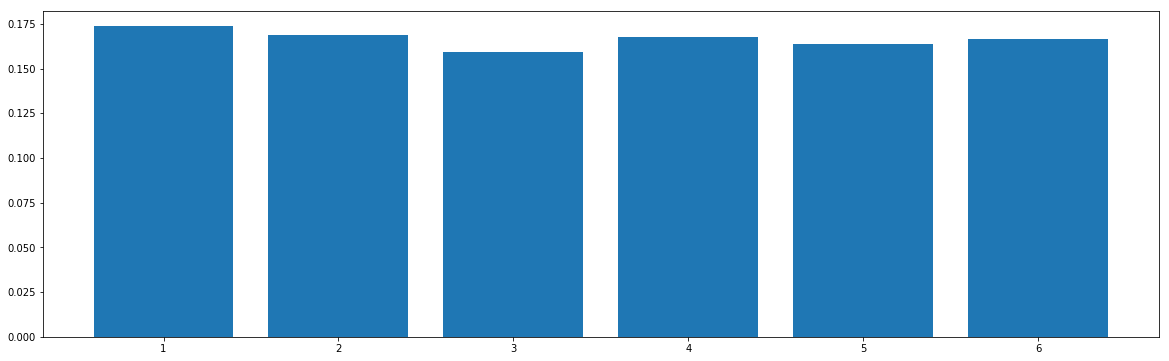

In [3]:
espacio_muestral, probs_dado_1 = plot_normalized_histogram_sorted(dado_1)

**Cantidad de bins en el histograma**: 6

In [4]:
print(espacio_muestral)
print(probs_dado_1)
print(len(dado_1))

[1 2 3 4 5 6]
[ 0.17383333  0.16883333  0.1595      0.1675      0.16366667  0.16666667]
6000


- Notar que en 6000 tiradas del dado tenemos aproximadamente la misma cantidad para cada cara del dado
- Aproximadamente 1/6

## Distribución Uniforme

\begin{equation}
\large
P(X = x_i) = \frac{1}{K}
\end{equation}
Donde $x_i$ son las seis posibles caras 1, 2, 3, 4, 5, 6

**Aclaración de notación:**
- Representaremos a las V.A con mayúscula
- A los posibles valores determinísticos que puede tomar con minúscula

Notar que lo que estamos suponiendo es que todas las salidas del espacio muestral son iguales de probables y como hay 6 salidas posibles, repartimos la probabilidad de igual forma para cada salida

Media (Esperanza - Valor esperado):

$x_i = [1, 2, 3, 4, 5, 6]$
\begin{equation}
\large
\mu_X = \sum_i{x_iP(X_i=x_i)} = \frac{1}{K}\sum_i^K{x_i} =\frac{1}{6} (1 + 2+3+4+5+6) = \frac{A+B}{2}=3.5
\end{equation}

Varianza:
\begin{equation}
\large
\sigma_X^2 = \sum_i{(x_i-\mu_X)^2P(X_i=x_i)} = \frac{1}{K}\sum_i^K{(x_i-\mu_X)^2} =\frac{1}{6}\sum_i^K{(i-\mu_X)^2} = \frac{(B-A+1)^2-1}{12}
\end{equation}

[]

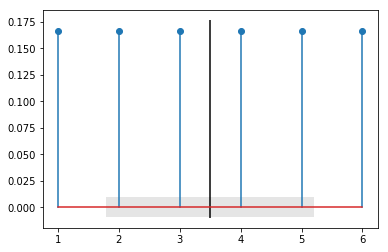

In [5]:
p = 1/6
plt.stem([1, 2, 3, 4, 5,6], [1/6]*6)
std = np.sqrt(((6-1+1)**2-1)/12)
plt.vlines(3.5, -0.01, 1/6+0.01)
plt.hlines(0, 3.5 + std, 3.5 - std, lw = 20, alpha = 0.1)
plt.plot()

# Estimación de media a partir de los datos:
Por que el promedio se usa para la estimación de la media

Diferencia entre decir:
- Tengo una distribución uniforme con 6 salidas equiprobables -> media 1/6
- Sumo todos los datos y divido por la cantidad

In [6]:
print(dado_1.mean())

3.47833333333


In [7]:
dado_1.sum()/ len(dado_1)

3.4783333333333335

\begin{equation}
\large
\mu_X = \sum_i^K{x_iP(X_i=x_i)} =\frac{1}{N} \sum_i^N{x_i}  = \frac{1}{N} [N_1 1 + N_2 2+N_3 3 + N_4 4+N_5 5 + N_6 6] = \frac{N_1}{N} 1 + \frac{N_2}{N} 2+\frac{N_3}{N} 3 + \frac{N_4}{N}4+\frac{N_5}{N} 5 + \frac{N_6}{N} 6
\end{equation}

## Modelo dado 1

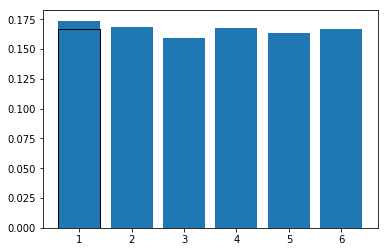

In [8]:
plt.bar(espacio_muestral, probs_dado_1)
plt.bar([1,2,3,4,5,6], 6*[1/6],   edgecolor='k', color = (0.2, 0.4, 0.6, 0.0))
plt.show()

### ¿Cuantos parámetros entonces tiene nuestro modelo?

1

### ¿Como lo estimo?

In [9]:
1/len(espacio_muestral)

0.16666666666666666

$P(X = 1) = \frac{1}{6}$  
$P(X = 2) =\frac{1}{6}$  
$P(X = 3) = \frac{1}{6}$  
$P(X = 4) = \frac{1}{6}$  
$P(X = 5) = \frac{1}{6}$  
$P(X = 6) = \frac{1}{6}$  

In [12]:
print('estimados de los datos:')
print(dado_1.mean(), dado_1.var())
print('Ideales para la uniforme con p=1/6:')
print(3.5, ((6-1+1)**2-1)/12)

estimados de los datos:
3.47833333333 2.95753055556
Ideales para la uniforme con p=1/6:
3.5 2.9166666666666665


In [13]:
# podemos calcularlo usando list comprehension
np.array([(i+1-3.5)**2 for i in range(6)]).sum()/6

2.9166666666666665

## MSE (Varianza del Error)

In [14]:
np.sum((probs_dado_1 - 1/6)**2)/6

1.9518518518518543e-05

In [15]:
np.var(probs_dado_1 - 1/6)

1.9518518518518543e-05

## Modelo paramétrico

![](modelo_param.png)

Modelo: Distribución uniforme

Parametros: p = 1/6

In [16]:
N = 10000
dado_gen = np.random.choice([1,2,3,4,5,6], size=N, p=[1/6]*6)
print(dado_gen[:100])
print(dado_gen.mean(), dado_gen.var())

[2 5 6 4 3 1 2 6 4 2 2 5 6 2 5 4 2 1 3 1 1 6 5 3 5 6 2 3 2 2 1 6 1 2 4 2 1
 2 4 2 5 5 6 3 5 1 5 2 6 2 3 5 3 6 5 1 2 1 4 2 3 5 6 1 6 3 6 6 3 5 4 4 3 1
 4 2 3 5 2 5 2 6 1 2 1 4 6 1 3 5 6 6 4 3 1 6 6 6 2 1]
3.4767 2.92185711


In [17]:
# Forma sencilla
np.random.randint(1,7,100)

array([3, 5, 5, 6, 2, 1, 5, 6, 4, 1, 1, 3, 4, 1, 3, 6, 6, 5, 4, 2, 4, 4, 4,
       1, 5, 1, 3, 3, 3, 2, 1, 4, 5, 1, 3, 3, 2, 3, 1, 2, 2, 3, 2, 6, 6, 5,
       2, 3, 3, 5, 3, 2, 5, 1, 1, 2, 6, 3, 1, 2, 6, 4, 1, 6, 4, 6, 1, 4, 3,
       2, 1, 1, 3, 3, 3, 6, 2, 3, 2, 3, 6, 6, 4, 3, 2, 6, 4, 2, 3, 1, 2, 2,
       5, 2, 3, 1, 2, 4, 6, 2])

## Modelo dado 2 (No paramétrico)

In [18]:
dado_2[:20]

array([3, 6, 6, 6, 4, 6, 3, 6, 4, 4, 6, 4, 4, 6, 6, 4, 6, 2, 6, 6])

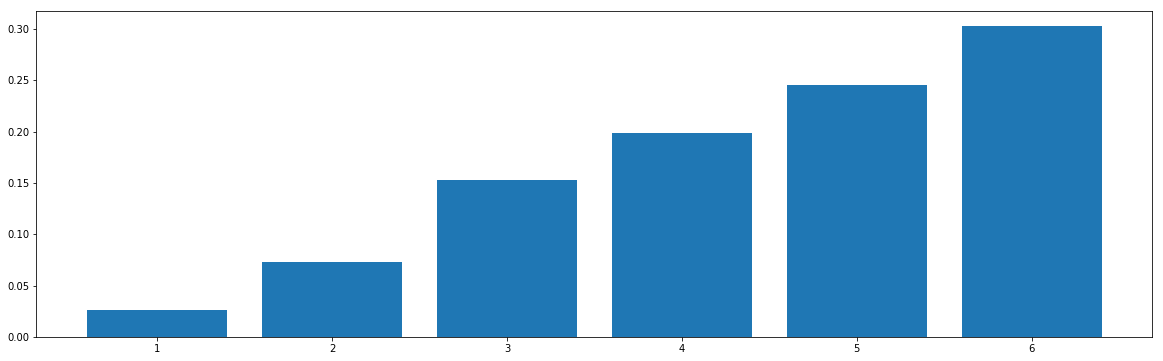

In [19]:
espacio_muestral, probs_dado_2 = plot_normalized_histogram_sorted(dado_2)

In [20]:
print(espacio_muestral)
print(probs_dado_2)

[1 2 3 4 5 6]
[ 0.02633333  0.073       0.15316667  0.199       0.24566667  0.30283333]


[]

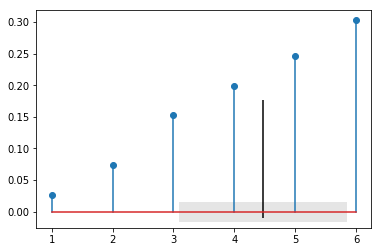

In [21]:
p = 1/6
plt.stem(espacio_muestral, probs_dado_2)
std = dado_2.std()
media = dado_2.mean()
plt.vlines(media, -0.01, 1/6+0.01)
plt.hlines(0, media + std, media - std, lw = 20, alpha = 0.1)
plt.plot()

### Como modelizo esta V.A?

$P(X = 1) = 0.0263$  
$P(X = 2) = 0.0730$  
$P(X = 3) = 0.1532$  
$P(X = 4) = 0.1990$  
$P(X = 5) = 0.2457$  
$P(X = 6) = 0.3028$  

### Cuantos parámetros tiene este modelo?

6

En este caso estoy guardando todo el histograma para representar mi modelo

### Como calculo la probabilidad de cada cara?

\begin{equation}
\large
P(X = x_i) = \frac{N_i}{N}
\end{equation}

- Donde N es 6000, la cantidad de veces que tiré el dado
- $N_i$ es la cantidad de veces que salio la cara i'ésima

### Como genero con python datos con esta distribución?

In [22]:
espacio_muestral, probs_dado_2

(array([1, 2, 3, 4, 5, 6]),
 array([ 0.02633333,  0.073     ,  0.15316667,  0.199     ,  0.24566667,
         0.30283333]))

In [23]:
np.random.choice([1, 2, 3, 4, 5, 6],  
                 size = 6000, 
                 p = [0.02633333, 0.073, 0.15316667, 0.199, 0.24566667,0.30283333], 
                 replace=True)

array([6, 4, 6, ..., 4, 4, 5])

## Resumiendo

Modelo 1:  
- Puedo representar la V.A del dado 1 con una distribución uniorme de parametro p=1/6. 
- Modelo paramétrico  

Modelo 2:   
- Tengo que indicar la probabilidad de cada una de las posibles salidas
- Modelo NO Paramétrico